# Load libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
!ls -a /content/drive/MyDrive/CAT_B_24

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Champions_Group_2025.csv  README.gdoc  Report.gdoc  requirements.gdoc


In [ ]:
file_path = "/content/drive/MyDrive/CAT_B_24/Champions_Group_2025.csv"
data = pd.read_csv(file_path)

data.columns

Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Is Domestic Ultimate', 'Is Global Ultimate'],
      dtype='object')

In [ ]:
# View the dataset
data.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,...,Company Status (Active/Inactive),Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Is Domestic Ultimate,Is Global Ultimate
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,...,Active,NaN,300.0,300.0,76973100,76973100,NaN,2020-09-30T04:00:00Z,0,0
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,YOTEI PTE. LTD.,...,Active,NaN,100.0,100.0,9499251,9499251,NaN,NaN,0,0
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,...,Active,4.0,22.0,22.0,13738494,13738494,Both Imports & Exports,2021-06-30T04:00:00Z,0,0
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,...,Active,NaN,100.0,100.0,103745791,103745791,NaN,NaN,0,0
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,...,Active,NaN,33.0,33.0,60863682,60863682,Both Imports & Exports,NaN,1,1


# Overview of dataset & Features Selection

## Missing values

We begin by assessing the percentage of missing data in the dataset.

In [ ]:
# Calculate the number of rows with missing values
percentage_complete = (data.dropna().shape[0] / data.shape[0]) * 100
percentage_complete


0.0

All rows in the dataset have missing values. Hence, it is impossible for us to remove all missing values in the dataset. Therefore, we need to investigate the missing values in each columns to decide which columns to remove.

Now, we calculate the percentage missing in each column to see which variable has highest number of missing value.

In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = data.isna().mean() * 100

# Display the result
print(missing_percentage)

LATITUDE                                 0.411212
LONGITUDE                                0.411212
AccountID                                0.000000
Company                                  0.000000
SIC Code                                 0.000000
Industry                                 0.000000
8-Digit SIC Code                         0.000000
8-Digit SIC Description                  0.000000
Year Found                               1.487218
Parent Company                           1.761360
Parent Country                           1.781920
Ownership Type                           0.000000
Company Description                      0.000000
Square Footage                         100.000000
Company Status (Active/Inactive)         0.000000
Employees (Single Site)                 42.502227
Employees (Domestic Ultimate Total)      0.270715
Employees (Global Ultimate Total)        9.505860
Sales (Domestic Ultimate Total USD)      0.000000
Sales (Global Ultimate Total USD)        0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Square Footage'),
  Text(1, 0, 'Import/Export Status'),
  Text(2, 0, 'Fiscal Year End'),
  Text(3, 0, 'Employees (Single Site)'),
  Text(4, 0, 'Employees (Global Ultimate Total)'),
  Text(5, 0, 'Parent Country'),
  Text(6, 0, 'Parent Company'),
  Text(7, 0, 'Year Found'),
  Text(8, 0, 'LATITUDE'),
  Text(9, 0, 'LONGITUDE'),
  Text(10, 0, 'Employees (Domestic Ultimate Total)'),
  Text(11, 0, 'Is Domestic Ultimate'),
  Text(12, 0, 'Sales (Global Ultimate Total USD)'),
  Text(13, 0, 'Sales (Domestic Ultimate Total USD)'),
  Text(14, 0, 'Company Description'),
  Text(15, 0, 'Company Status (Active/Inactive)'),
  Text(16, 0, 'Ownership Type'),
  Text(17, 0, '8-Digit SIC Description'),
  Text(18, 0, '8-Digit SIC Code'),
  Text(19, 0, 'Industry'),
  Text(20, 0, 'SIC Code'),
  Text(21, 0, 'Company'),
  Text(22, 0, 'AccountID'),
  Text(23, 0, 'Is Global Ultimate')])

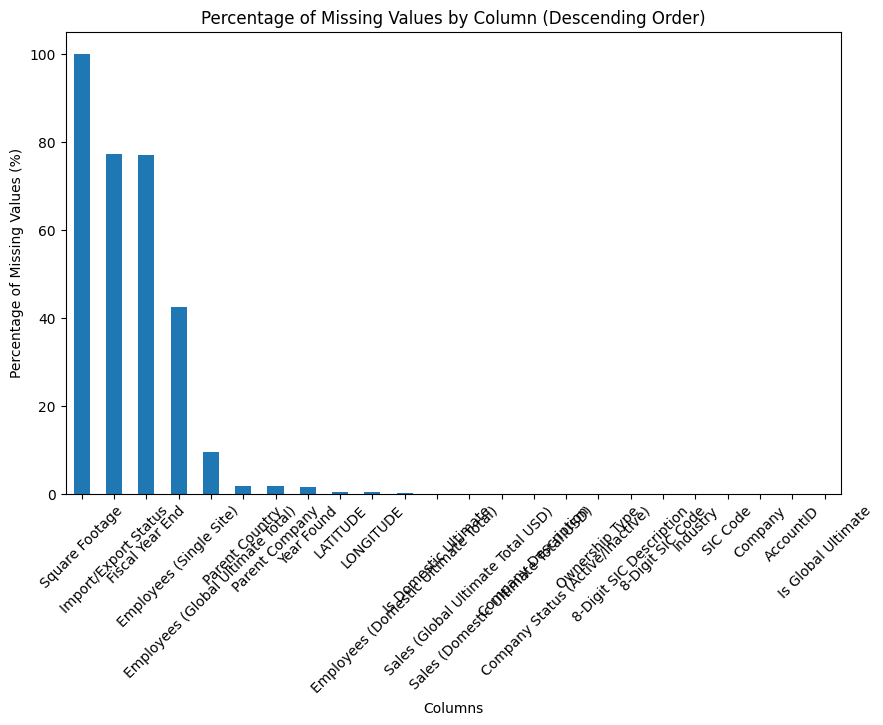

In [ ]:
# Sort the missing percentages in descending order
missing_percent_sorted = missing_percentage.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
missing_percent_sorted.plot(kind='bar')

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Values by Column (Descending Order)')
plt.xticks(rotation=45)

Among all columns, these are columns with high percentage of missing values:
1. Square Footage (100% missing)
2. Employees (Single Site) (42.5% missing)
3. Import/Export Status (77.3% missing)
4. Fiscal Year End (76.9%) missing

Thus, we will remove these columns.
    

In [ ]:
# Remove columns "Square Footage", "Employees", "Import/Export Status", "Fiscal Year End"
data = data.drop(columns = ['Square Footage','Employees (Single Site)','Import/Export Status','Fiscal Year End']
                )
data.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,Active,300.0,300.0,76973100,76973100,0,0
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,Active,100.0,100.0,9499251,9499251,0,0
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,Active,22.0,22.0,13738494,13738494,0,0
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,Active,100.0,100.0,103745791,103745791,0,0
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,Active,33.0,33.0,60863682,60863682,1,1


## Target variables

We create a contingency table to display the count of pairs of two target variables `Is Domestic Ultimate` and `Is Global Ultimate`.


In [ ]:
pd.crosstab(data['Is Domestic Ultimate'],data['Is Global Ultimate'])

Is Global Ultimate,0,1
Is Domestic Ultimate,,
0,14589,0
1,7086,7507


Observation:
- There are no (1, 1) pairs (i.e `Is Global Ultimate` == 1 & `Is Domestic Ultimate` == 1)
- If a company is global ultimate (`Is Global Ultimate` == 1), then it has 100% chance of being domestic ultimate (`Is Domestic Ultimate` == 1)
- However, if a company is domestic ultimate (`Is Domestic Ultimate` == 1), then it has around 51% of being global ultimate.

Therefore, to predict the two target variables, `Is Global Ultimate` and `Is Domestic Ultimate`, we will combine them into a single response variable called `Structure`, based on the three possible pairs of target variables as follows:


\begin{array}{|c|c|c|}
\hline
\textbf{Is Global Ultimate} & \textbf{Is Domestic Ultimate} & \textbf{Structure} \\
\hline
1 & 0 \text{ or } 1 & \text{Global} \\
\hline
0 & 1 & \text{Domestic} \\
\hline
0 & 0 & \text{None} \\
\hline
\end{array}


Now, we create a new response variable `Structure` as our new output response based on two target variables.


In [ ]:
# Create new output response
data['Structure'] = np.select(
    [
        data['Is Global Ultimate'] == 1,
        (data['Is Domestic Ultimate'] == 1) & (data['Is Global Ultimate'] == 0)
    ],
    ['Global', 'Domestic'],
    default='None'
)

# Drop the columns 'Is Domestic Ultimate' and 'Is Global Ultimate'
data = data.drop(['Is Domestic Ultimate', 'Is Global Ultimate'], axis=1)
data.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Structure
0,1.238792,103.685898,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,Active,300.0,300.0,76973100,76973100,None
1,1.240392,103.837565,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,Active,100.0,100.0,9499251,9499251,None
2,1.240392,103.837565,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,Active,22.0,22.0,13738494,13738494,None
3,1.240409,103.837960,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,Active,100.0,100.0,103745791,103745791,None
4,1.240784,103.839111,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,Active,33.0,33.0,60863682,60863682,Global


## Feature Selection

For quantitative variables, a statistical analysis will be conducted to evaluate the mean and median as key summary statistics across different company structures. Furthermore, the distribution of these variables will be visualized using boxplots and/or smooth density plots to provide deeper insights.

For categorical variables, contingency tables will be constructed to compare the conditional probabilities of each category in relation to the company structure, facilitating a comprehensive understanding of their associations.

### `LONGITUDE` & `LATITUDE` variable

In [ ]:
# Select the relevant columns
long_lat = data[['LATITUDE', 'LONGITUDE', 'Structure']]

# Group by 'Structure' and calculate mean and median of latitude and longitude
longlat_summary = long_lat.groupby('Structure').agg(
    mean_long=('LONGITUDE', 'mean'),
    mean_lat=('LATITUDE', 'mean'),
    med_long=('LONGITUDE', 'median'),
    med_lat=('LATITUDE', 'median')
).reset_index()

# Display the summary
print(longlat_summary)


  Structure   mean_long  mean_lat    med_long   med_lat
0  Domestic  103.842558  1.323394  103.848989  1.314218
1    Global  103.844183  1.317756  103.849079  1.305038
2      None  103.843253  1.320862  103.848816  1.309109


The summary statistics indicate that the mean and median of longitude and latitude are approximately similar across all Structure types.

Next, we plot the distribution of Longitude and Latitude variable in relation to each company structure.

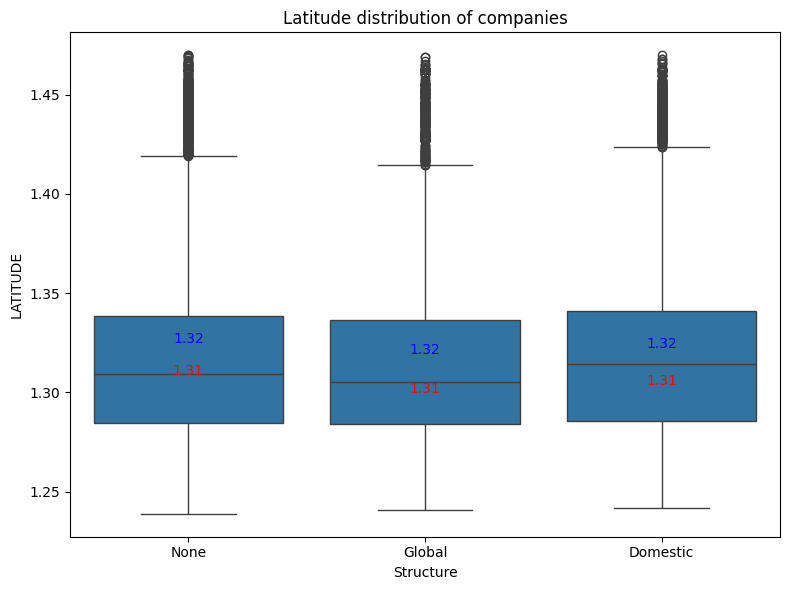

In [ ]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Structure', y='LATITUDE', data=long_lat)

# Annotate with mean
mean_values = long_lat.groupby('Structure')['LATITUDE'].mean()
for i, structure in enumerate(mean_values.index):
    plt.text(i, mean_values[structure], round(mean_values[structure], 2),
             horizontalalignment='center', verticalalignment='bottom', color='blue')

# Annotate with median
median_values = long_lat.groupby('Structure')['LATITUDE'].median()
for i, structure in enumerate(median_values.index):
    plt.text(i, median_values[structure], round(median_values[structure], 2),
             horizontalalignment='center', verticalalignment='top', color='red')

# Customize the plot
plt.title('Latitude distribution of companies')
plt.tight_layout()

# Show the plot
plt.show()


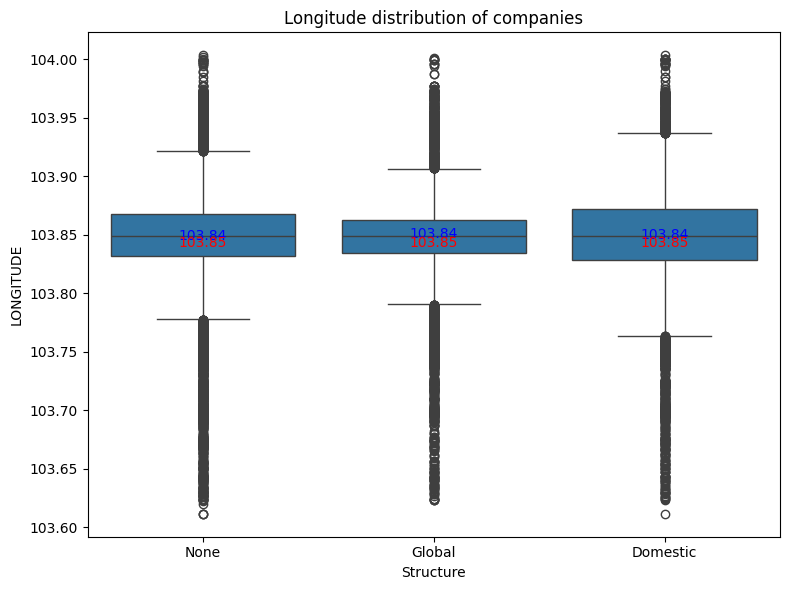

In [ ]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Structure', y='LONGITUDE', data=long_lat)

# Annotate with mean
mean_values = long_lat.groupby('Structure')['LONGITUDE'].mean()
for i, structure in enumerate(mean_values.index):
    plt.text(i, mean_values[structure], round(mean_values[structure], 2),
             horizontalalignment='center', verticalalignment='bottom', color='blue')

# Annotate with median
median_values = long_lat.groupby('Structure')['LONGITUDE'].median()
for i, structure in enumerate(median_values.index):
    plt.text(i, median_values[structure], round(median_values[structure], 2),
             horizontalalignment='center', verticalalignment='top', color='red')

# Customize the plot
plt.title('Longitude distribution of companies')
plt.tight_layout()

# Show the plot
plt.show()


Observation:
- Overall, visually there is no much distinction between the geographical distribution of companies with different hierarchical structure.
- Hence, geographical structure might not be a good variable to differentiate between hierarchical structure.

We will drop the `LONGITUDE` and `LATITUDE` columns.

In [ ]:
# Drop LONGITUDE, LATITUDE variable
data = data.drop(columns = ['LONGITUDE','LATITUDE'])
data.head()

,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Structure
0,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,Active,300.0,300.0,76973100,76973100,None
1,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,Active,100.0,100.0,9499251,9499251,None
2,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,Active,22.0,22.0,13738494,13738494,None
3,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,Active,100.0,100.0,103745791,103745791,None
4,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,Active,33.0,33.0,60863682,60863682,Global


### `YEAR FOUND` variable

In [ ]:
# Perform statistical study and print out statistical summary
print(data.groupby('Structure')['Year Found'].describe())

             count         mean        std     min     25%     50%     75%  \
Structure                                                                    
Domestic    7031.0  2003.929455  12.391039  1917.0  1997.0  2007.0  2013.0   
Global      7424.0  2007.053475  14.573943  1819.0  2002.0  2012.0  2017.0   
None       14293.0  2003.466242  13.197877  1887.0  1996.0  2007.0  2012.0   

              max  
Structure          
Domestic   2023.0  
Global     2023.0  
None       2023.0  


Observation:
- There are significant differences in the mean and median founding year of between companies of different structures.

Thus, it is likely that `YEAR FOUND` might have an association to the response variable `Structure`. We further investigate the distribution of `YEAR FOUND` variable in relation to different company structures.

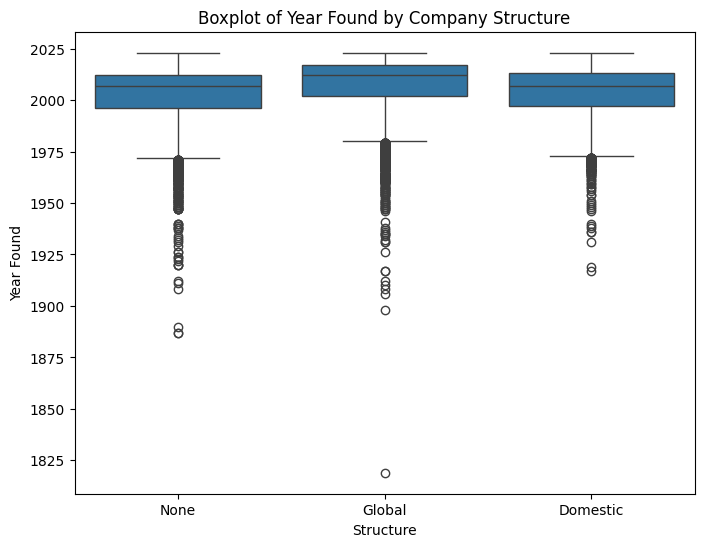

In [ ]:
# Create a boxplot of Year Found by Company Structure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Structure', y='Year Found', data=data)
plt.title('Boxplot of Year Found by Company Structure')
plt.xlabel('Structure')
plt.ylabel('Year Found')
plt.show()

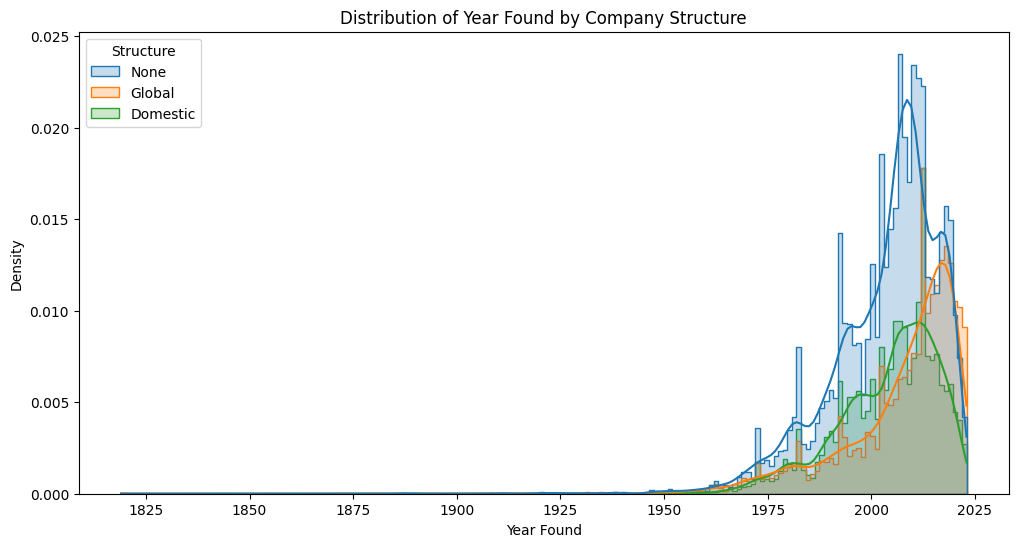

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Year Found', hue='Structure', kde=True, element='step', stat='density')
plt.title('Distribution of Year Found by Company Structure')
plt.xlabel('Year Found')
plt.ylabel('Density')
plt.show()

The distribution of 'Year Found' is highly left-skewed. The histogram shows that the more domestic or globally oriented a company is, the later it was founded.

### `EMPLOYEE` variable

In [ ]:
# Perform statistical study and print out summary statistics
employee_summary = data.groupby('Structure').agg(
    mean_employee_global=('Employees (Global Ultimate Total)', 'mean'),
    mean_employee_domestic=('Employees (Domestic Ultimate Total)', 'mean'),
    median_employee_global=('Employees (Global Ultimate Total)', 'median'),
    median_employee_domestic=('Employees (Domestic Ultimate Total)', 'median')
).reset_index()

employee_summary

,Structure,mean_employee_global,mean_employee_domestic,median_employee_global,median_employee_domestic
0,Domestic,25426.343583,89.622031,850.0,22.0
1,Global,667.970047,55.517416,7.0,7.0
2,None,3704.056026,207.577246,15.0,20.0


Overall, the employee counts at domestic and global ultimate sites exhibit distinct statistical patterns across different company structures.

There are significant differences in mean and median employee count at domestic and global ultimate sites across company structures.

We further explore the pattern of employee counts at global and domestic sites in each company structure via a scatter plot.

<ipython-input-227-55ab51fdd456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['log_employees_global'] = np.log(employee['Employees (Global Ultimate Total)'])


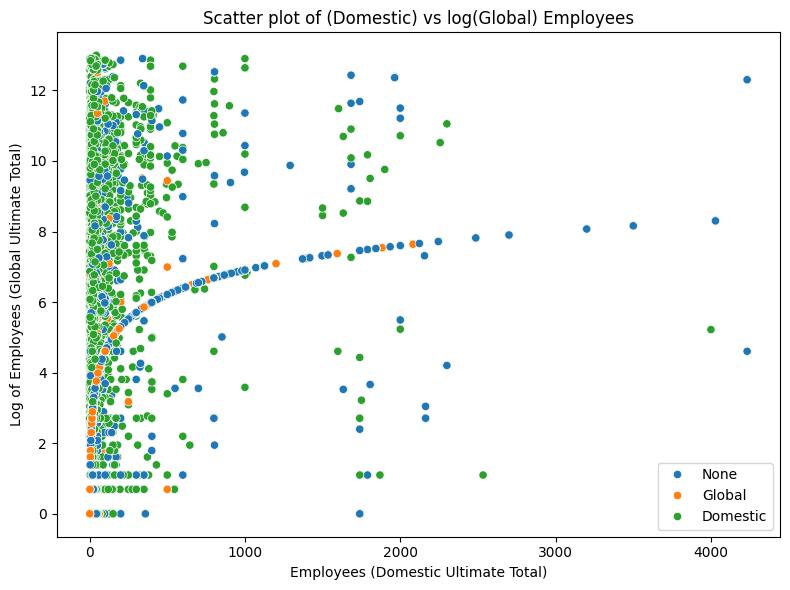

In [ ]:
employee = data[['Employees (Global Ultimate Total)','Employees (Domestic Ultimate Total)','Structure']]
employee['log_employees_global'] = np.log(employee['Employees (Global Ultimate Total)'])
filtered_employee = employee[(employee['Employees (Domestic Ultimate Total)'] < 5000) &
                              (employee['Employees (Global Ultimate Total)'] < 500000)]

# Create the scatter plot with log transformation of Global Employees
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_employee,
                x='Employees (Domestic Ultimate Total)',
                y=np.log(filtered_employee['Employees (Global Ultimate Total)']),
                hue='Structure',
                color='Structure'
               )  # Adjust color palette

# Set the labels and title
plt.xlabel("Employees (Domestic Ultimate Total)")
plt.ylabel("Log of Employees (Global Ultimate Total)")
plt.title("Scatter plot of log(Domestic) vs log(Global) Employees")

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


Observation:
- The scatter plot reveals a logarithmic-like trend, with most data points along this curve representing companies with a 'None' or 'Global' structure.
- In contrast, companies with a 'Domestic' structure are more dispersed vertically, forming a cluster along the domestic employee count axis, primarily within the range of 0 to 1,000 employees.

Conclusion:
- Due to (i) the significant statistical distribution of mean and median employee count at domestic and global sites of different company structures and (ii) significant pattern in the employee count distribution in different company structures,  the `EMPLOYEE` variable(s) have a strong association to the output variable


### `SALES` variable

In [ ]:
# Perform statistical study and print out summary statistics
sales_summary = data.groupby('Structure').agg(
    mean_sales_domestic=('Sales (Domestic Ultimate Total USD)', 'mean'),
    mean_sales_global=('Sales (Global Ultimate Total USD)', 'mean'),
    median_sales_domestic=('Sales (Domestic Ultimate Total USD)', 'median'),
    median_sales_global=('Sales (Global Ultimate Total USD)', 'median')
).reset_index()

sales_summary

,Structure,mean_sales_domestic,mean_sales_global,median_sales_domestic,median_sales_global
0,Domestic,3.281637e+08,9.445496e+09,4514078.0,177322470.5
1,Global,7.097422e+07,3.644505e+08,1026308.0,1026308.0
2,None,1.308492e+09,3.089330e+09,4623465.0,3307860.0


The mean and median sales at domestic and global sites vary significantly across companies with different structures.

Now we further epxlore the distribution of sales at different company structures.

Due to the large scale of the sales values, we will apply a natural logarithm transformation before plotting the smooth density distribution.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-229-fd9b69dbd7e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['log_sales_domestic'] = np.log(sales['Sales (Domestic Ultimate Total USD)'])


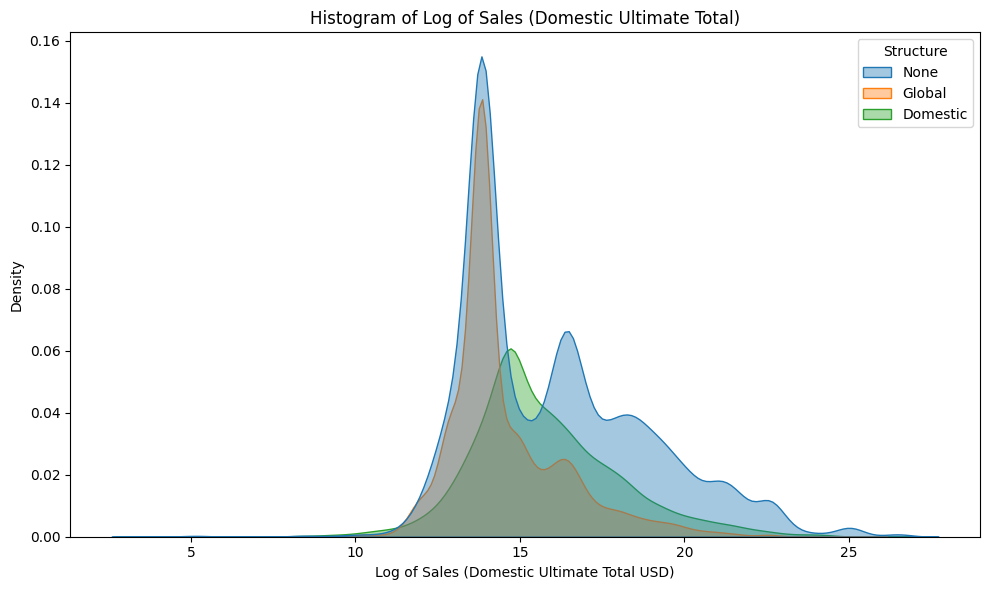

In [ ]:
# Apply log transformation
sales = data[['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)','Structure']]
sales['log_sales_domestic'] = np.log(sales['Sales (Domestic Ultimate Total USD)'])

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='log_sales_domestic', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Log of Sales (Domestic Ultimate Total)")
plt.xlabel("Log of Sales (Domestic Ultimate Total USD)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()


<ipython-input-230-cd0bf4ef92df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['log_sales_global'] = np.log(sales['Sales (Global Ultimate Total USD)'])


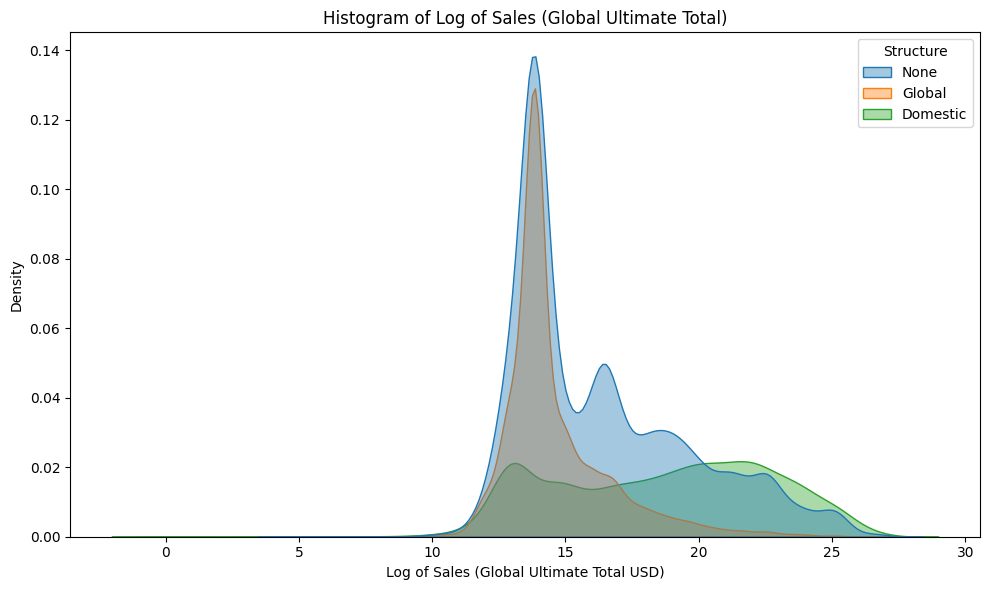

In [ ]:
sales['log_sales_global'] = np.log(sales['Sales (Global Ultimate Total USD)'])

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='log_sales_global', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Log of Sales (Global Ultimate Total)")
plt.xlabel("Log of Sales (Global Ultimate Total USD)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

Observation & Conclusion:
- The distribution of Logarithm of Sales (Global) and Logarithm of Sales (Domestic), visually, differs for each company structure
- Thus, sales might have an association to the response variable `Structure`

### `SIC Code` variable

At first glance, `SIC Code` and `8-Digit SIC Code` appear to represent the same information. Therefore, we aim to evaluate whether these two variables differ and assess their potential association with the response variable.

In a business context, while the 8-Digit SIC Code is not an official code used by the U.S. government, it serves as an extension developed by private agencies and companies. The U.S. Government allows additional subdivisions within specific four-digit industries, as stated in the SIC Code Manual, enabling more detailed industry classification. These extended SIC Codes (6, 7, and 8-digit versions) are continually updated by private data firms to refine industry categorization for marketing and identification purposes. As a result, the 8-Digit SIC Code can be a valuable indicator of whether a company operates within a branched or specialized industry.

Hence, we will explore how the `8-Digit SIC Code` is extended from the `SIC Code` by exploring the extended last 4 digits.

Since the `8-Digit SIC Code` is extended from the `SIC Code`, we hypothesise that the first 4 digits of the `8-Digit SIC Code` are similar from that of `SIC Code`. If any `8-Digit SIC Code` has the first 4 digits matching to that of `SIC Code`, we will mark it as `Matched` and `Unmatched` otherwise.

We will verify the hypothesis using a pie chart of "Matched" vs "Unmatched" proportion.

<ipython-input-231-ead7c4107ad3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digits['first_4_digits'] = digits['8-Digit SIC Code'].astype(str).str[:4]
<ipython-input-231-ead7c4107ad3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digits['prefix'] = digits['first_4_digits'] == digits['SIC Code'].astype(str)


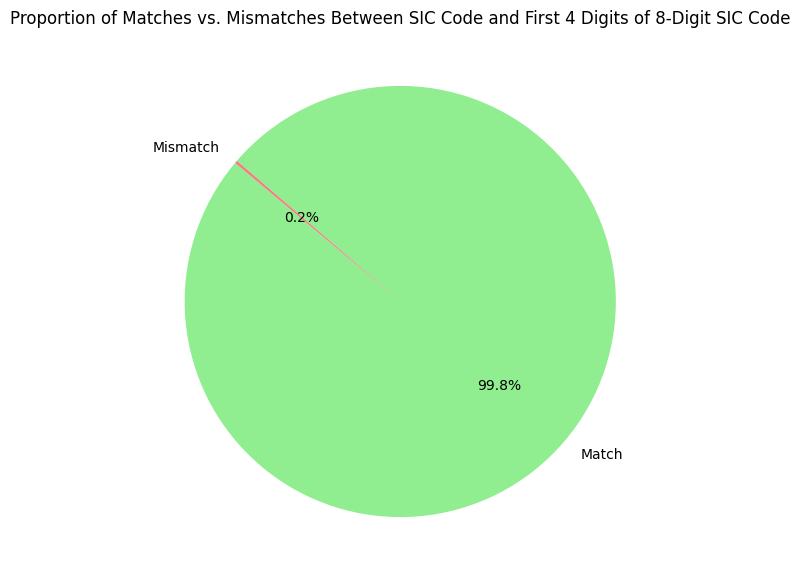

In [ ]:
digits = data[['SIC Code','8-Digit SIC Code']]

# Extract the first 4 digits of the 8-Digit SIC Code
digits['first_4_digits'] = digits['8-Digit SIC Code'].astype(str).str[:4]

# Check if the first 4 digits match the SIC Code
digits['prefix'] = digits['first_4_digits'] == digits['SIC Code'].astype(str)

# Count matches and mismatches
match_counts = digits['prefix'].value_counts()

# Create labels
labels = ['Match', 'Mismatch']
colors = ['lightgreen', 'lightcoral']

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(match_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proportion of Matches vs. Mismatches Between SIC Code and First 4 Digits of 8-Digit SIC Code")

# Show the plot
plt.show()

Since 99.8% of the dataset shows that the first four digits of the 8-Digit SIC Code match the SIC Code, we can confirm that the 8-Digit SIC Code is an extension of the SIC Code with an additional four-digit suffix.

Next, we analyze the last four digits of the 8-Digit SIC Code to understand their patterns and significance.

<ipython-input-232-ba85015264d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digits['last_4_digits'] = digits['8-Digit SIC Code'].astype(str).str[-4:]


<Figure size 1200x600 with 0 Axes>

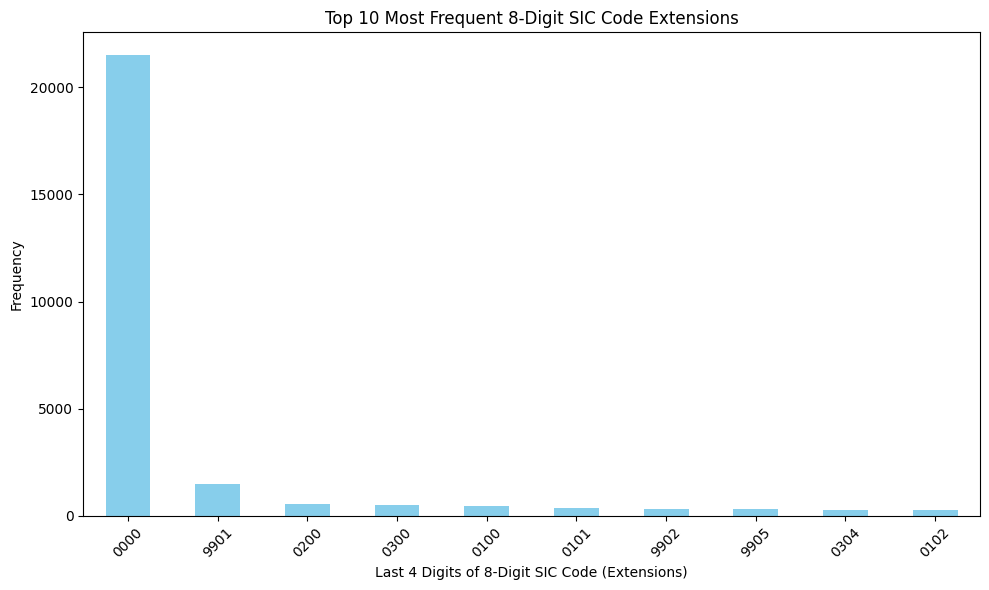

In [ ]:
digits['last_4_digits'] = digits['8-Digit SIC Code'].astype(str).str[-4:]

# Count the frequency of each unique last 4-digit extension
extension_counts = digits['last_4_digits'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
# Select the top 10 most frequent extensions
top_10_extensions = extension_counts.head(10)

# Plot the bar chart for the top 10 extensions
plt.figure(figsize=(10, 6))
top_10_extensions.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel("Last 4 Digits of 8-Digit SIC Code (Extensions)")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent 8-Digit SIC Code Extensions")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Observation:
- Majority of the 4-digit extensions are the code '0000'

Conclusion:
- We can confirm that the 8-Digit SIC Code is generated by appending '0000' to the SIC Code

Thus, we create another variable `Mismatch` from the `SIC Code` and `8-Digit SIC Code`:
- `Mismatch` = 'Matched' if the `8-Digit SIC Code` = `SIC Code` + '0000'
- `Mismatch` = 'Mismatch', otherwise

In [ ]:
# Create variable "Mismatch" from "SIC Code" and "8-Digit SIC Code"

# Create the 'Mismatch' column based on the condition
data['Mismatch'] = data.apply(lambda row: 'Match' if str(row['8-Digit SIC Code']) == str(row['SIC Code']) + '0000' else 'Mismatch', axis=1)

# Display the first few rows to verify the transformation
data.head()

,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Structure,Mismatch
0,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,2821,"Plastics Materials, Synthetic Resins, and Nonv...",28210000,Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,Active,300.0,300.0,76973100,76973100,None,Match
1,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,Active,100.0,100.0,9499251,9499251,None,Match
2,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,6799,"Investors, Not Elsewhere Classified",67990102,Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,Active,22.0,22.0,13738494,13738494,None,Mismatch
3,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,Active,100.0,100.0,103745791,103745791,None,Match
4,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,6712,Offices of Bank Holding Companies,67120000,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,Active,33.0,33.0,60863682,60863682,Global,Match


We will build a contingency table and perform Chi-square test to check the p-value. This aims to explain whether variable `Mismatch` has assocation to the response variable.

In [ ]:
mismatch_table = pd.crosstab(data['Mismatch'],data['Structure'])

In [ ]:
# Perform Chi-Square test
chi_sq_test_mismatch = chi2_contingency(mismatch_table)

# Get the p-value
p_value_mismatch = chi_sq_test_mismatch[1]

p_value_mismatch

2.4881322450577296e-167

Since the p-value is much lower than the threshold, it suggests that the `Mismatch` variable has a statistical significance in predicting the output response.

Since we create another variable `Mismatch` from `SIC Code` and `8-Digit SIC Code`, we will drop these columns.

In [ ]:
# Drop columns
data = data.drop(columns = ['SIC Code', '8-Digit SIC Code'])
data.head()

,AccountID,Company,Industry,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Structure,Mismatch
0,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,"Plastics Materials, Synthetic Resins, and Nonv...",Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,Active,300.0,300.0,76973100,76973100,None,Match
1,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,Active,100.0,100.0,9499251,9499251,None,Match
2,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,"Investors, Not Elsewhere Classified",Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,Active,22.0,22.0,13738494,13738494,None,Mismatch
3,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,"Offices of Holding Companies, Not Elsewhere Cl...","Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,Active,100.0,100.0,103745791,103745791,None,Match
4,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,Active,33.0,33.0,60863682,60863682,Global,Match


### `Company Status` variable

We build a contigency table to explore the count of each category of Company Status in each type of company structure.

In [ ]:
pd.crosstab(data['Company Status (Active/Inactive)'], data['Structure'])

Structure,Domestic,Global,None
Company Status (Active/Inactive),,,
Active,7086,7507,14589


Observation & conclusion:
- In `Company Status` variable, all are 'Active'
- This suggests that there is no difference in the `Company Status` regardless of the company structure
- Hence, `Company Status` has no association to the output variable

We will drop the column `Company Status`.

In [ ]:
# Drop the column "Company Status"
data = data.drop(columns = ['Company Status (Active/Inactive)'])

### `Ownership Type` variable

We create a contingency table to examine the distribution of Ownership Type categories across different types of company structures.

In [ ]:
ownership_table = pd.crosstab(data['Ownership Type'], data['Structure'])
ownership_table

Structure,Domestic,Global,None
Ownership Type,,,
Non-Corporates,0,6,3
Nonprofit,1,2,1
Partnership,4,31,10
Private,6975,7050,14225
Public,106,417,302
Public Sector,0,1,48


We identified that the categories "Public" and "Public Sector" in the `Ownership Type` variable likely represent the same group.

Subsequently, we will compute the Bayesian statistics table to determine the conditional probability of a company belonging to a specific type of company structure based on its ownership type.

In [ ]:
# Merge "Public" and "Public Sector" into one category "Public"
data['Ownership Type'] = data['Ownership Type'].replace({'Public Sector': 'Public'})

In [ ]:
# Calculate the Bayesian statistics table
# This computes the conditional probability of each Structure category given the Ownership Type

bayesian_table = pd.crosstab(data['Ownership Type'], data['Structure'], normalize='index') * 100

bayesian_table


Structure,Domestic,Global,None
Ownership Type,,,
Non-Corporates,0.000000,66.666667,33.333333
Nonprofit,25.000000,50.000000,25.000000
Partnership,8.888889,68.888889,22.222222
Private,24.690265,24.955752,50.353982
Public,12.128146,47.826087,40.045767


By Baysian statistics:
- Given that a company is of "Non-Corporates" owernship type, its structure has 0% chance of being "Domestic", 66.7% of being "Global", and 33.3% of being "None"
- Given that company is of "Nonprofit" type, its structure has 25% chance of being "Domestic", 50% chance of being "Global", and 25% chance of being "None"
- Given that a company is of "Partnership" type, its structure has 8.9% being "Domestic", 68.9% of being "Global", and 22.2% of being "None"
- Given that a company is of "Private" type, its structure has 24.7% of being "Domestic", 25.0% of being "Global", and 50.3% of being "None"
- Given that a company is of "Public" type, its structure has 12.1% of being "Domestic", 47.8% of being "Global", and 40.1% of being "None"

Observation:
- Since the conditional probability of a company being "Global", "Domestic" or "None" differs much given its owernship type, it suggests that `Ownership Type` has an association to the response variable.

We further test the strength of the association via Chi-square test.

In [ ]:
# Perform Chi-Square test
chi_sq_test = chi2_contingency(ownership_table)

# Get the p-value
p_value = chi_sq_test[1]

p_value


1.9043387815252204e-75

The p-value is much lower than the usual threshold of 0.05, thus `Ownership Type` has a strong association and statistically significant in predicting the output variable.

# Feature Engineering & Data Transformations

After selecting variables associated with the response variable, we remove all missing values before applying transformations. Since columns with a high percentage of missing data have already been dropped, the remaining dataset has minimal missing values, ensuring that complete-case analysis does not compromise data integrity.

In [ ]:
# Original datashape
data.shape

# XGBoost takes data with missing values
xgb_data = data.copy()

In [ ]:
# Remove all missing values
data = data.dropna()
data.shape

(25501, 15)

## `YEAR FOUND` variable

We will convert the `Year Found` variable into `Age` by calculating the difference between the current year and the founding year. This transformation allows for a more intuitive interpretation of a company's longevity, making it easier to compare across different organizations.

In [ ]:
# Transform the 'Year Found' to 'Age'
data['Age'] = (2025 - data['Year Found']).astype(int)
data.drop(columns = ['Year Found'])
data.head()

<ipython-input-245-1491d199a7cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = (2025 - data['Year Found']).astype(int)


,AccountID,Company,Industry,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Structure,Mismatch,Age
0,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,"Plastics Materials, Synthetic Resins, and Nonv...",Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,300.0,300.0,76973100,76973100,None,Match,45
1,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,100.0,100.0,9499251,9499251,None,Match,32
2,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,"Investors, Not Elsewhere Classified",Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,22.0,22.0,13738494,13738494,None,Mismatch,7
3,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,"Offices of Holding Companies, Not Elsewhere Cl...","Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,100.0,100.0,103745791,103745791,None,Match,21
4,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,33.0,33.0,60863682,60863682,Global,Match,39


## `SALES` variable

We first see the distribution of Sales variable.

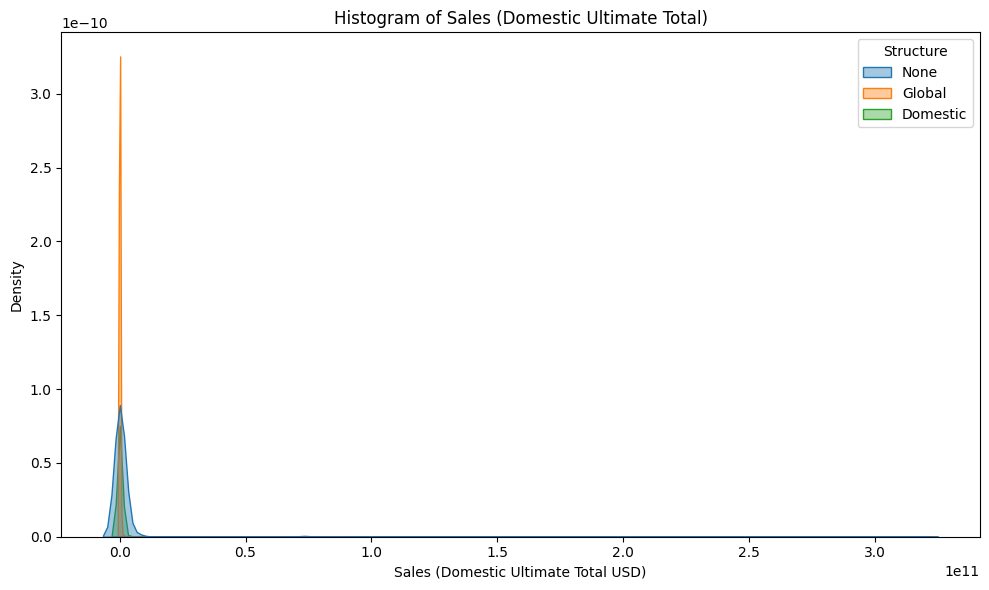

In [ ]:
sales = data[['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)','Structure']]

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='Sales (Domestic Ultimate Total USD)', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Sales (Domestic Ultimate Total)")
plt.xlabel("Sales (Domestic Ultimate Total USD)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

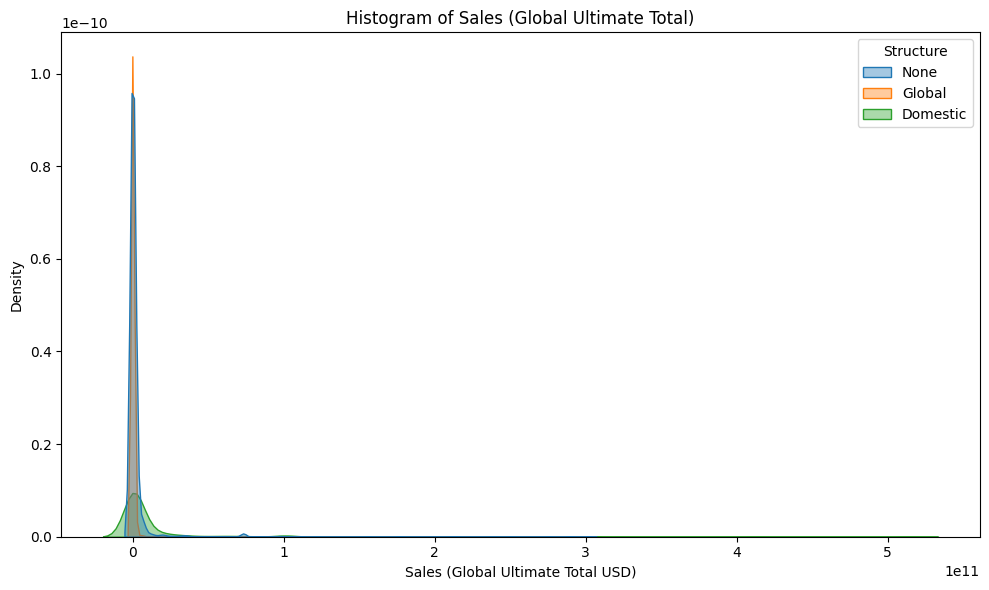

In [ ]:
sales = data[['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)','Structure']]

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='Sales (Global Ultimate Total USD)', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Sales (Global Ultimate Total)")
plt.xlabel("Sales (Global Ultimate Total USD)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

Both the distributions of Sales (Global) and Sales (Distribution) are skewed, we will thus apply a natural logarithm transformation to normalize it before applying to machine learning models.

In [ ]:
# Provide an offset to make sure the Sales data non-negative
offset_domestic_sales = -data['Sales (Domestic Ultimate Total USD)'].min() + 1

# Apply natural lograithm to sales(domestic)
data['Sales (Domestic)'] = data['Sales (Domestic Ultimate Total USD)'] + offset_domestic_sales
data['Log_Sales (Domestic)'] = np.log(data['Sales (Domestic)'])

In [ ]:
# Provide an offset to make sure the Sales data non-negative
offset_global_sales = -data['Sales (Global Ultimate Total USD)'].min() + 1

# Apply natural lograithm to sales(domestic)
data['Sales (Global)'] = data['Sales (Global Ultimate Total USD)'] + offset_global_sales
data['Log_Sales (Global)'] = np.log(data['Sales (Global)'])

## `EMPLOYEE` variable

Similarly, the distributions of Employees variable are skewed.

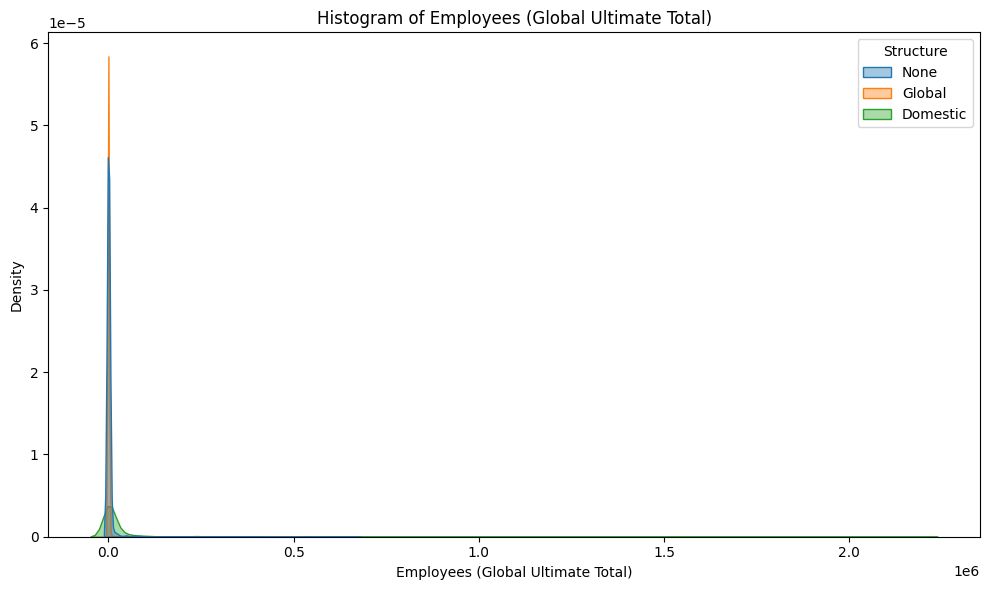

In [ ]:
employee = data[['Employees (Global Ultimate Total)','Employees (Domestic Ultimate Total)','Structure']]

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=employee, x='Employees (Global Ultimate Total)', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Employees (Global Ultimate Total)")
plt.xlabel("Employees (Global Ultimate Total)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

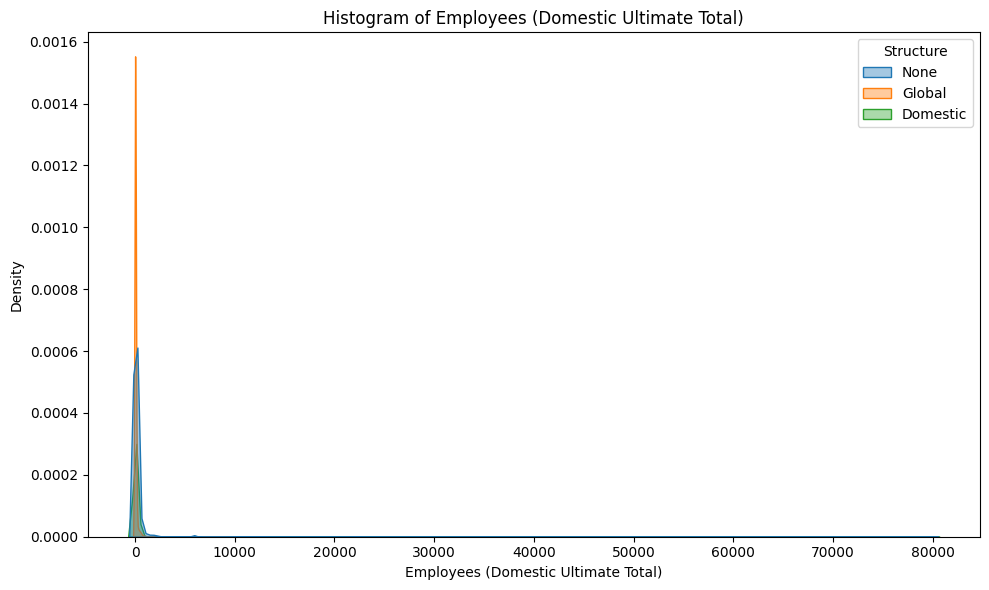

In [ ]:
# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=employee, x='Employees (Domestic Ultimate Total)', fill=True, hue='Structure', alpha=0.4, linewidth=1)

# Add labels and title
plt.title("Histogram of Employees (Domestic Ultimate Total)")
plt.xlabel("Employees (Domestic Ultimate Total)")
plt.ylabel("Density")

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

Hence, due to skewness, we will apply natural logarithm transformations to the employee variables.

In [ ]:
# Provide an offset to make sure the Employee (domestic) data non-negative
offset_domestic_employee = -data['Employees (Domestic Ultimate Total)'].min() + 1

# Apply natural lograithm to sales(domestic)
data['Employee(Domestic)'] = data['Employees (Domestic Ultimate Total)'] + offset_domestic_employee
data['Log_Employee (Domestic)'] = np.log(data['Employee(Domestic)'])

# Provide an offset to make sure the Employee(global) data non-negative
offset_domestic_employee = -data['Employees (Global Ultimate Total)'].min() + 1

# Apply natural lograithm to sales(domestic)
data['Employee(Global)'] = data['Employees (Global Ultimate Total)'] + offset_domestic_employee
data['Log_Employee (Global)'] = np.log(data['Employee(Global)'])



## `Ownership Type` variable

We will regroup the categories in `Ownership Type` to avoid sparse data and improve data imbalance.

In [ ]:
# Regroup the categories
ownership_mapping = {
    'Non-Corporates': 'Others',  # Small or Medium-sized Enterprises
    'Nonprofit': 'Others',
    'Partnership': 'Others',     # Partnerships often represent small or medium businesses
    'Private': 'Private',
    'Public': 'Public',
    'Public Sector': 'Public'  # Combining Public and Public Sector
}

# Apply the mapping to the Ownership Type column
data['Ownership Type'] = data['Ownership Type'].map(ownership_mapping)

In [ ]:
data.head()

,AccountID,Company,Industry,8-Digit SIC Description,Year Found,Parent Company,Parent Country,Ownership Type,Company Description,Employees (Domestic Ultimate Total),...,Mismatch,Age,Sales (Domestic),Log_Sales (Domestic),Sales (Global),Log_Sales (Global),Employee(Domestic),Log_Employee (Domestic),Employee(Global),Log_Employee (Global)
0,LAKB2BID143135,ALLIED SPECIALTY COMPOUNDS PTE LTD,"Plastics Materials, Synthetic Resins, and Nonv...",Plastics materials and resins,1980.0,INTEGRATED PLASTICS TECHNOLOGY PTE LTD,Singapore,Private,Allied Specialty Compounds Pte Ltd is primaril...,300.0,...,Match,45,227236201,19.241501,76973100,18.158967,300.0,5.703782,300.0,5.703782
1,LAKB2BID8280323,CATALLA INVESTMENTS PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1993.0,YOTEI PTE. LTD.,Singapore,Private,Catalla Investments Pte Ltd is primarily engag...,100.0,...,Match,32,159762352,18.889198,9499251,16.066724,100.0,4.605170,100.0,4.605170
2,LAKB2BID8357906,SQUARE TRADING SINGAPORE PTE. LTD.,"Investors, Not Elsewhere Classified",Commodity contract trading companies,2018.0,SQUARE RESOURCES HOLDING SINGAPORE PTE. LTD.,Singapore,Private,Square Trading Singapore Pte. Ltd. is primaril...,22.0,...,Mismatch,7,164001595,18.915387,13738494,16.435712,22.0,3.091042,22.0,3.091042
3,LAKB2BID8798827,HG METAL INVESTMENTS PTE. LTD.,"Offices of Holding Companies, Not Elsewhere Cl...","Holding companies, nec",2004.0,HG METAL MANUFACTURING LIMITED,Singapore,Private,Hg Metal Investments Pte. Ltd. is primarily en...,100.0,...,Match,21,254008892,19.352880,103745791,18.457454,100.0,4.605170,100.0,4.605170
4,LAKB2BID1753792,UP-LEVEN INVESTMENT PTE LTD,Offices of Bank Holding Companies,Bank holding companies,1986.0,UP-LEVEN INVESTMENT PTE LTD,Singapore,Private,Up-Leven Investment Pte Ltd is primarily engag...,33.0,...,Match,39,211126783,19.167969,60863682,17.924147,33.0,3.496508,33.0,3.496508


# Machine Learning Models

In [ ]:
# Change data type of "Ownership Type" and "Mismatch" columns
data['Ownership Type'] = data['Ownership Type'].map({'Public': 0, 'Private': 1, 'Others': 2})
data['Mismatch'] = data['Mismatch'].map({'Match': 0, 'Mismatch': 1})

In [ ]:
# Extract chosen columns for dataset for machine learning models
df = data[['Log_Employee (Domestic)', 'Log_Employee (Global)',
           'Log_Sales (Domestic)', 'Log_Sales (Global)',
           'Mismatch', 'Ownership Type', 'Age','Structure']
         ]
df.head()

,Log_Employee (Domestic),Log_Employee (Global),Log_Sales (Domestic),Log_Sales (Global),Mismatch,Ownership Type,Age,Structure
0,5.703782,5.703782,19.241501,18.158967,0,1,45,None
1,4.605170,4.605170,18.889198,16.066724,0,1,32,None
2,3.091042,3.091042,18.915387,16.435712,1,1,7,None
3,4.605170,4.605170,19.352880,18.457454,0,1,21,None
4,3.496508,3.496508,19.167969,17.924147,0,1,39,Global


## (Multilnominal) Logistic Regression

In [ ]:
# Encode the target variable ('Structure')
label_encoder = LabelEncoder()
df['Structure'] = label_encoder.fit_transform(df['Structure'])
df.head()

<ipython-input-155-fd54b9b1b9d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Structure'] = label_encoder.fit_transform(df['Structure'])


,Log_Employee (Domestic),Log_Employee (Global),Log_Sales (Domestic),Log_Sales (Global),Mismatch,Ownership Type,Age,Structure
0,5.703782,5.703782,19.241501,18.158967,0,1,45,2
1,4.605170,4.605170,18.889198,16.066724,0,1,32,2
2,3.091042,3.091042,18.915387,16.435712,1,1,7,2
3,4.605170,4.605170,19.352880,18.457454,0,1,21,2
4,3.496508,3.496508,19.167969,17.924147,0,1,39,1


In [ ]:
# Define feature variables (excluding 'Structure')
X_LR = df.drop(columns=['Structure'])
y_LR = df['Structure']

In [ ]:
X_LR.shape

(25501, 7)

In [ ]:
y_LR.shape

(25501,)

In [ ]:
# Split data into training and test sets
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42, stratify=y_LR)


In [ ]:
LR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}
grid_search = GridSearchCV(LR_model, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_LR, y_train_LR)

# Best model after tuning
best_model_LR = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predictions
y_pred_LR = best_model_LR.predict(X_test_LR)
y_prob_LR = best_model_LR.predict_proba(X_test_LR)

# Compute evaluation metrics
accuracy_LR = accuracy_score(y_test_LR, y_pred_LR)
precision_LR = precision_score(y_test_LR, y_pred_LR, average='weighted')
recall_LR = recall_score(y_test_LR, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test_LR, y_pred_LR, average='weighted')
roc_auc_LR = roc_auc_score(y_test_LR, y_prob_LR, multi_class='ovr')

In [ ]:
# Print results
print("Best Regularization Parameter (C):", grid_search.best_params_['C'])
print("Accuracy:", accuracy_LR)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_LR)
print("ROC AUC Score:", roc_auc_LR)

cm_LR = confusion_matrix(y_test_LR, y_pred_LR)
cr_LR = classification_report(y_test_LR, y_pred_LR)
print(cm_LR)
print(cr_LR)

Best Regularization Parameter (C): 1
Accuracy: 0.619486375220545
Precision: 0.6271659921754643
Recall: 0.619486375220545
F1 Score: 0.5835462041370552
ROC AUC Score: 0.744797786449319
[[ 544   23  432]
 [  24  328 1119]
 [ 122  221 2288]]
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       999
           1       0.57      0.22      0.32      1471
           2       0.60      0.87      0.71      2631

    accuracy                           0.62      5101
   macro avg       0.65      0.55      0.56      5101
weighted avg       0.63      0.62      0.58      5101



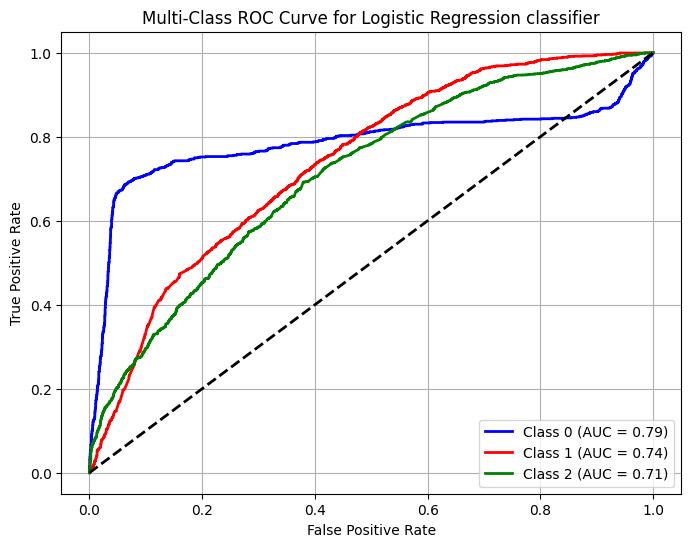

In [ ]:
# Binarize the output variable for multi-class ROC
y_test_binarized_LR = label_binarize(y_test_LR, classes=[0, 1, 2])  # Adjust based on label encoding

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_labels = label_encoder.classes_  # Get original class names

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_binarized_LR[:, i], y_prob_LR[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for Logistic Regression classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## KNN

In [ ]:
X_knn = df.drop(columns=['Structure'])
y_knn = df['Structure']

# Split train test data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42, stratify=y_knn)

In [ ]:
# Before tuning
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_model.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6698686532052539


In [ ]:
# Tuning
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': list(range(1, 50, 2)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_knn.fit(X_train_knn, y_train_knn)

print("Best parameters found:", grid_search_knn.best_params_)
print("Best cross-validation accuracy:", grid_search_knn.best_score_)

Best parameters found: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Best cross-validation accuracy: 0.703235294117647


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Accuracy: 0.7006469319741228
Precision: 0.7011824083850832
Recall: 0.7006469319741228
F1 Score: 0.7005944502705939
ROC AUC Score: 0.8516239539836375
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       999
           1       0.59      0.58      0.58      1471
           2       0.72      0.74      0.73      2631

    accuracy                           0.70      5101
   macro avg       0.71      0.70      0.70      5101
weighted avg       0.70      0.70      0.70      5101



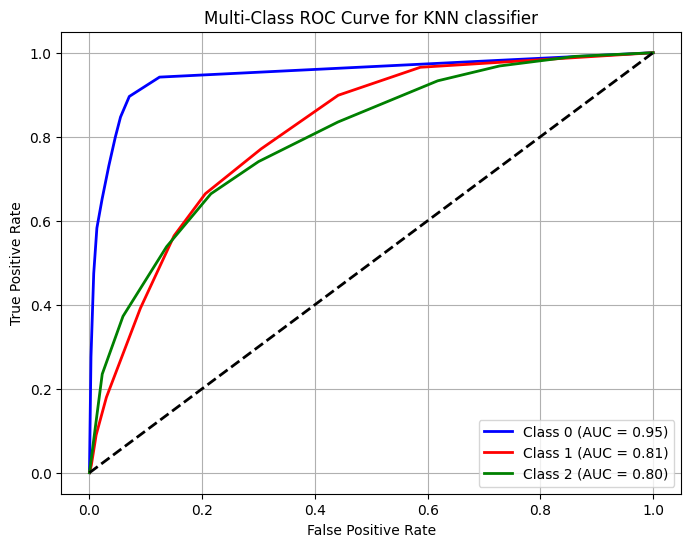

In [ ]:
# Predictions
best_knn = tuned_model_knn
y_pred_knn = best_knn.predict(X_test_knn)
y_prob_knn = best_knn.predict_proba(X_test_knn)  # KNN supports probability prediction for k > 1

# Compute evaluation metrics
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
precision_knn = precision_score(y_test_knn, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_knn, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_knn, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test_knn, y_prob_knn, multi_class='ovr')

# Print results
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("ROC AUC Score:", roc_auc_knn)  # Multi-class ROC AUC
print(classification_report(y_test_knn, y_pred_knn))

# Binarize the output variable for multi-class ROC
y_test_binarized_knn = label_binarize(y_test_knn, classes=[0, 1, 2])  # Adjust based on label encoding

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_labels = label_encoder.classes_  # Get original class names

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_binarized_knn[:, i], y_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for KNN classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Random Forest

In [ ]:
X_rf = df.drop(columns=['Structure'])
y_rf = df['Structure']

# Split data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)

In [ ]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_rf, y_train_rf)

# Best model after tuning
best_rf = grid_search_rf.best_estimator_

In [ ]:
# Predictions
y_pred_rf = best_rf.predict(X_test_rf)
y_prob_rf = best_rf.predict_proba(X_test_rf)

# Compute evaluation metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_rf, y_pred_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test_rf, y_prob_rf, multi_class='ovr')

# Print results
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)

cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cr_rf = classification_report(y_test_rf, y_pred_rf)
print(cm_rf)
print(cr_rf)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7351499705940012
Precision: 0.7309169528200438
Recall: 0.7351499705940012
F1 Score: 0.7322589773849266
ROC AUC Score: 0.8902979768890997
[[ 901   11   87]
 [   5  826  640]
 [ 129  479 2023]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       999
           1       0.63      0.56      0.59      1471
           2       0.74      0.77      0.75      2631

    accuracy                           0.74      5101
   macro avg       0.74      0.74      0.74      5101
weighted avg       0.73      0.74      0.73      5101



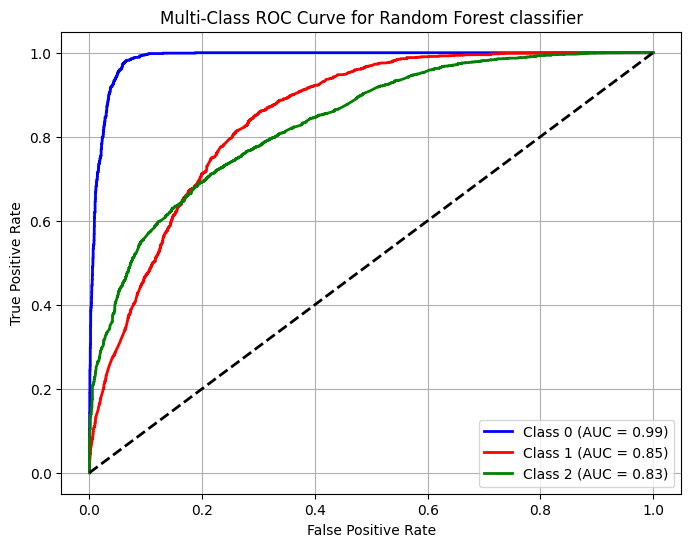

In [ ]:
# Binarize the output variable for multi-class ROC
y_test_binarized_rf = label_binarize(y_test_rf, classes=[0, 1, 2])  # Adjust based on label encoding

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_labels = label_encoder.classes_  # Get original class names

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_binarized_rf[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for Random Forest classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## XGBoost

For XGBoost, we use the dataset that still have missing values in row before engineering it because of the better results in evaluation metrics

In [ ]:
# Engineering xgb_data

# Map values for "Ownership Type", "Mismatch", "Structure" columns
xgb_data['Ownership Type'] = xgb_data['Ownership Type'].map({'Public': 0, 'Private': 1, 'Others': 2})
xgb_data['Mismatch'] = xgb_data['Mismatch'].map({'Match': 0, 'Mismatch': 1})
xgb_data['Structure'] = xgb_data['Structure'].map({'Domestic': 0, 'Global': 1, 'None': 2})

# Change "Year Found" to "Age"
xgb_data['Age'] = 2025 - xgb_data['Year Found']

# Use "Log_Sales (Domestic)" instead of "Sales (Domestic Ultimate Total USD)"
offset_domestic = -xgb_data['Sales (Domestic Ultimate Total USD)'].min() + 1
xgb_data['Sales (Domestic)'] = xgb_data['Sales (Domestic Ultimate Total USD)'] + offset_domestic
xgb_data['Log_Sales (Domestic)'] = np.log(xgb_data['Sales (Domestic)'])

# Use "Log_Sales (Global)" instead of "Sales (Global Ultimate Total USD)"
offset_global = -xgb_data['Sales (Global Ultimate Total USD)'].min() + 1
xgb_data['Sales (Global)'] = xgb_data['Sales (Global Ultimate Total USD)'] + offset_global
xgb_data['Log_Sales (Global)'] = np.log(xgb_data['Sales (Global)'])

# Use "Log_Employees (Domestic)" instead of "Employees (Domestic Ultimate Total)"
offset_domestic_emp = -xgb_data['Employees (Domestic Ultimate Total)'].min() + 1
xgb_data['Employees (Domestic)'] = xgb_data['Employees (Domestic Ultimate Total)'] + offset_domestic_emp
xgb_data['Log_Employees (Domestic)'] = np.log(xgb_data['Employees (Domestic)'])

# UseUse "Log_Employees (Global)" instead of "Employees (Global Ultimate Total)"
offset_global_emp = -xgb_data['Employees (Global Ultimate Total)'].min() + 1
xgb_data['Employees (Global)'] = xgb_data['Employees (Global Ultimate Total)'] + offset_global_emp
xgb_data['Log_Employees (Global)'] = np.log(xgb_data['Employees (Global)'])

In [ ]:
# Extract chosen columns for dataset for XGBoost
xgb_data = xgb_data[['Log_Employees (Domestic)', 'Log_Employees (Global)',
           'Log_Sales (Domestic)', 'Log_Sales (Global)',
           'Mismatch', 'Ownership Type', 'Age','Structure']
         ]
xgb_data.head()

,Log_Employees (Domestic),Log_Employees (Global),Log_Sales (Domestic),Log_Sales (Global),Mismatch,Ownership Type,Age,Structure
0,5.703782,5.703782,19.241501,18.158967,0,1,45.0,2
1,4.605170,4.605170,18.889198,16.066724,0,1,32.0,2
2,3.091042,3.091042,18.915387,16.435712,1,1,7.0,2
3,4.605170,4.605170,19.352880,18.457454,0,1,21.0,2
4,3.496508,3.496508,19.167969,17.924147,0,1,39.0,1


In [ ]:
X_xgb = xgb_data.drop(columns=['Structure'])
y_xgb = xgb_data['Structure']

X_xgb['Mismatch'] = X_xgb['Mismatch'].astype("object")
X_xgb['Ownership Type'] = X_xgb['Ownership Type'].astype("object")

# Split train test data
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42, stratify=y_xgb)

In [ ]:
# Filling missing values
numeric_cols = ["Age", "Log_Sales (Domestic)", "Log_Sales (Global)",
                "Log_Employees (Domestic)", "Log_Employees (Global)"]
cat_cols = ['Mismatch', 'Ownership Type']

num_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=7))
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, cat_cols)
])

X_train_xgb = preprocessor.fit_transform(X_train_xgb)
X_test_xgb = preprocessor.transform(X_test_xgb)

In [ ]:
# Training on model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    objective="multi:softmax",
    num_class=3,
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)

print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print(classification_report(y_test_xgb, y_pred_xgb))

XGBoost Accuracy: 0.7363262105469516
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       999
           1       0.63      0.58      0.60      1471
           2       0.74      0.77      0.75      2631

    accuracy                           0.74      5101
   macro avg       0.75      0.74      0.75      5101
weighted avg       0.73      0.74      0.73      5101



In [ ]:
# Manual Tuning
X_sample, _, y_sample, _ = train_test_split(X_train_xgb, y_train_xgb, test_size=0.7, random_state=42)

xgb_param_list = [
    {"n_estimators": 100, "learning_rate": 0.01, "max_depth": 3},
    {"n_estimators": 300, "learning_rate": 0.1, "max_depth": 5},
    {"n_estimators": 500, "learning_rate": 0.1, "max_depth": 7},
    {"n_estimators": 700, "learning_rate": 0.05, "max_depth": 10},
]

xgb_best_model = None
xgb_best_accuracy = 0

for params in xgb_param_list:
    print(f"Training with {params}")

    xgb_model = XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        max_depth=params["max_depth"],
        random_state=42
    )

    xgb_model.fit(X_train_xgb, y_train_xgb)

    y_pred_xgb = xgb_model.predict(X_test_xgb)
    accuracy = accuracy_score(y_test_xgb, y_pred_xgb)

    print(f"Accuracy: {accuracy:.4f}")

    if accuracy > xgb_best_accuracy:
        xgb_best_accuracy = accuracy
        best_model = xgb_model

print("\nBest Accuracy:", xgb_best_accuracy)


Training with {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 3}
Accuracy: 0.6771
Training with {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.7334
Training with {'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 7}
Accuracy: 0.7408
Training with {'n_estimators': 700, 'learning_rate': 0.05, 'max_depth': 10}
Accuracy: 0.7348

Best Accuracy: 0.7408351303665948


Accuracy: 0.7347578906096843
Precision: 0.7337245225608657
Recall: 0.7347578906096843
F1 Score: 0.7341718285722442
ROC AUC Score: 0.8853290903136942
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       999
           1       0.61      0.60      0.61      1471
           2       0.74      0.75      0.75      2631

    accuracy                           0.73      5101
   macro avg       0.75      0.75      0.75      5101
weighted avg       0.73      0.73      0.73      5101



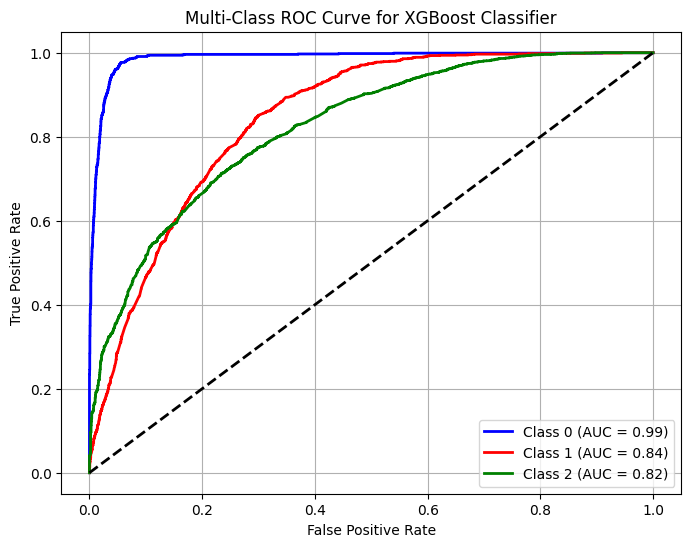

In [ ]:
# Prediction
best_xgb = xgb_model
y_pred_xgb = best_xgb.predict(X_test_xgb)
y_prob_xgb = best_xgb.predict_proba(X_test_xgb)

# Compute evaluation metrics
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
precision_xgb = precision_score(y_test_xgb, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_xgb, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_xgb, y_pred_xgb, average='weighted')
roc_auc_xgb = roc_auc_score(y_test_xgb, y_prob_xgb, multi_class='ovr')

# Print results
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("ROC AUC Score:", roc_auc_xgb)  # Multi-class ROC AUC
print(classification_report(y_test_xgb, y_pred_xgb))

# Binarize the output variable for multi-class ROC
y_test_binarized_xgb = label_binarize(y_test_xgb, classes=[0, 1, 2])  # Adjust if different number of classes

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_labels = label_encoder.classes_  # Get original class names

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_binarized_xgb[:, i], y_prob_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for XGBoost Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## CNN

In [ ]:
X_cnn = df.drop(columns=['Structure'])
y_cnn = df['Structure']

# Split train test data
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42, stratify=y_xgb)

In [ ]:
# Before tuning
cnn_model = Sequential()

cnn_model.add(Dense(units=64, activation='relu', input_shape=(X_train_cnn.shape[1],)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units=3, activation='softmax'))

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_test_cnn, y_test_cnn),
    epochs=30,
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0, 2: 1.0}
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4836 - loss: 1.3285 - val_accuracy: 0.6328 - val_loss: 0.8874
Epoch 2/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5988 - loss: 0.8958 - val_accuracy: 0.6342 - val_loss: 0.8208
Epoch 3/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6205 - loss: 0.8449 - val_accuracy: 0.6336 - val_loss: 0.7759
Epoch 4/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6333 - loss: 0.8066 - val_accuracy: 0.6510 - val_loss: 0.7450
Epoch 5/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6444 - loss: 0.7768 - val_accuracy: 0.6540 - val_loss: 0.7151
Epoch 6/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6530 - loss: 0.7565 - val_accuracy: 0.6646 - val_loss: 0.7018
Epoch 7/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6655 - loss: 0.7367 - val_accuracy: 0.6710 - val_loss: 0.6889
Epoch 8/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6692 - loss: 0.7301 - val_accuracy: 0.

In [ ]:
y_pred_probs_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_probs_cnn, axis=1)
accuracy = accuracy_score(y_test_cnn, y_pred_classes_cnn)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test_cnn, y_pred_classes_cnn)
print("Confusion Matrix:\n", cm)

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7035875318564987
Confusion Matrix:
 [[ 951    8   40]
 [  40  640  791]
 [ 265  368 1998]]


In [ ]:
# Tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    cnn_model = keras.Sequential()

    hp_units_1 = hp.Int('units_1', min_value=32, max_value=128, step=32)
    cnn_model.add(layers.Dense(units=hp_units_1, activation='relu',
                           input_shape=(X_train_cnn.shape[1],)))
    hp_dropout_1 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    cnn_model.add(layers.Dropout(hp_dropout_1))

    hp_units_2 = hp.Int('units_2', min_value=16, max_value=64, step=16)
    cnn_model.add(layers.Dense(units=hp_units_2, activation='relu'))
    hp_dropout_2 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)
    cnn_model.add(layers.Dropout(hp_dropout_2))

    cnn_model.add(layers.Dense(3, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 5e-4, 1e-5])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    cnn_model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return cnn_model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='my_keras_tuning'
)

tuner.search(
    X_train_cnn,
    y_train_cnn,
    epochs=10,
    validation_data=(X_test_cnn, y_test_cnn),
    batch_size=32
)

best_hyperparameter = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
print(best_hyperparameter.values)

tuned_model_cnn = tuner.hypermodel.build(best_hyperparameter)

history = tuned_model_cnn.fit(
    X_train_cnn,
    y_train_cnn,
    validation_data=(X_test_cnn, y_test_cnn),
    epochs=30,
    batch_size=32
)

test_loss, test_acc = tuned_model_cnn.evaluate(X_test_cnn, y_test_cnn)
print("Tuned model test accuracy:", test_acc)

Trial 10 Complete [00h 00m 47s]
val_accuracy: 0.5743972063064575

Best val_accuracy So Far: 0.693785548210144
Total elapsed time: 00h 06m 26s
Best hyperparameters found:
{'units_1': 64, 'dropout_1': 0.1, 'units_2': 48, 'dropout_2': 0.1, 'learning_rate': 0.001}
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


638/638 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5093 - loss: 1.3365 - val_accuracy: 0.6434 - val_loss: 0.8051
Epoch 2/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6169 - loss: 0.8321 - val_accuracy: 0.6556 - val_loss: 0.7531
Epoch 3/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6481 - loss: 0.7642 - val_accuracy: 0.6550 - val_loss: 0.7243
Epoch 4/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6574 - loss: 0.7475 - val_accuracy: 0.6779 - val_loss: 0.7022
Epoch 5/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6672 - loss: 0.7188 - val_accuracy: 0.6652 - val_loss: 0.6903
Epoch 6/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6744 - loss: 0.7086 - val_accuracy: 0.6822 - val_loss: 0.6661
Epoch 7/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6838 - loss: 0.6947 - val_accuracy: 0.6750 - val_loss: 0.6695
Epoch 8/30
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6868 - loss: 0.6826 - val_accuracy: 0.6756 - val_

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7041756518329739
Precision: 0.697247730939598
Recall: 0.7041756518329739
F1 Score: 0.697393345349003
ROC AUC Score: 0.8661193217345002
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       999
           1       0.61      0.51      0.56      1471
           2       0.72      0.72      0.72      2631

    accuracy                           0.70      5101
   macro avg       0.70      0.72      0.71      5101
weighted avg       0.70      0.70      0.70      5101



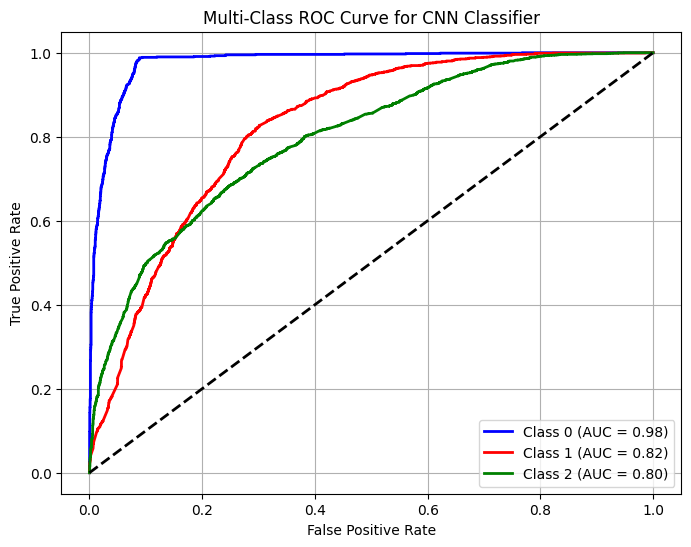

In [ ]:
# Predictions
best_cnn = tuned_model_cnn
y_prob_cnn = best_cnn.predict(X_test_cnn)  # CNN outputs probability distributions
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)  # Convert probabilities to class labels

# Compute evaluation metrics
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
precision_cnn = precision_score(y_test_cnn, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test_cnn, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test_cnn, y_pred_cnn, average='weighted')
roc_auc_cnn = roc_auc_score(y_test_cnn, y_prob_cnn, multi_class='ovr')

# Print results
print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1 Score:", f1_cnn)
print("ROC AUC Score:", roc_auc_cnn)  # Multi-class ROC AUC
print(classification_report(y_test_cnn, y_pred_cnn))

# Binarize the output variable for multi-class ROC
y_test_binarized_cnn = label_binarize(y_test_cnn, classes=[0, 1, 2])  # Adjust if different number of classes

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_labels = label_encoder.classes_  # Get original class names

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_binarized_cnn[:, i], y_prob_cnn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for CNN Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Comparison of Models

In [ ]:
# Given data
models = ['LR', 'knn','rf','xgb','cnn']
accuracy_model = ["accuracy_" + i for i in models]
precision_model = ["precision_" + i for i in models]
f1_model = ["precision_" + i for i in models]
recall_model = ["recall_" + i for i in models]
roc_auc_model = ["roc_auc_" + i for i in models]



In [ ]:
# Retrieve values dynamically
accuracy_values = [globals()[var] for var in accuracy_model]
precision_values = [globals()[var] for var in precision_model]
f1_values = [globals()[var.replace("precision", "f1")] for var in f1_model]
recall_values = [globals()[var] for var in recall_model]
roc_auc_values = [globals()[var] for var in roc_auc_model]

In [ ]:
# Define metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'F1 Score', 'Recall', 'ROC AUC']
values = [accuracy_values, precision_values, f1_values, recall_values, roc_auc_values]

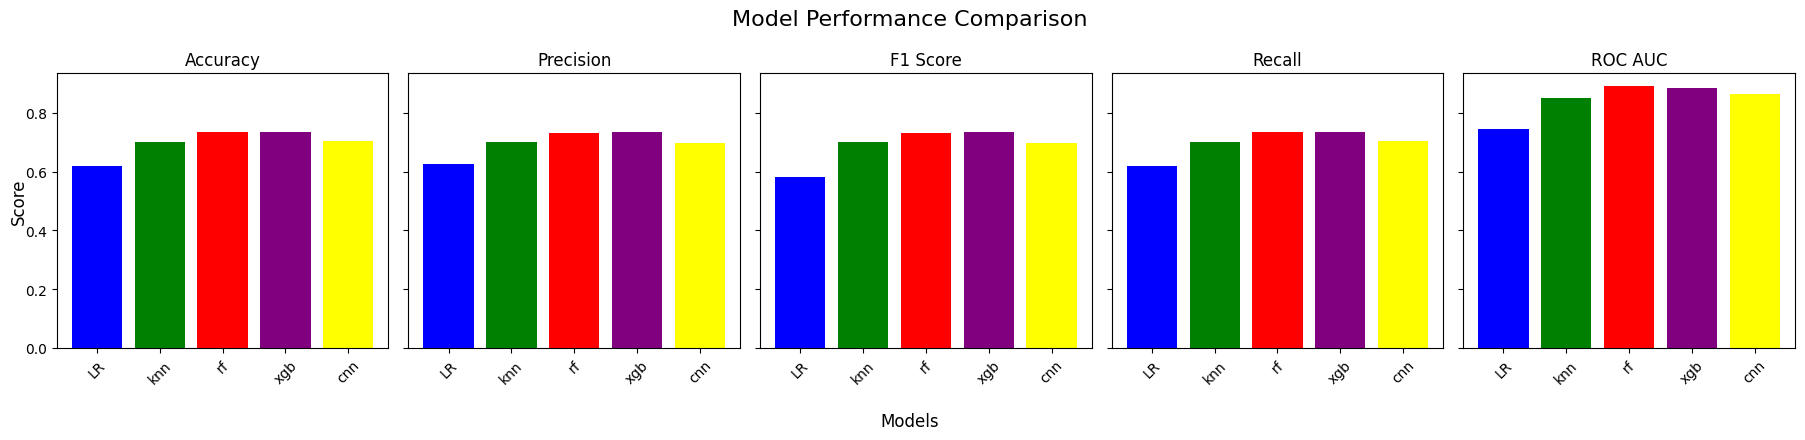

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4), sharey=True)
# Iterate over each metric and plot it
for i, (metric, vals) in enumerate(zip(metrics, values)):
    axes[i].bar(models, vals, color=['blue', 'green', 'red', 'purple','yellow'])
    axes[i].set_title(metric)
    axes[i].set_xticks(range(len(models)))  # Fix x-ticks
    axes[i].set_xticklabels(models, rotation=45)

    # Set shared y-axis label
fig.text(0, 0.5, 'Score', va='center', rotation='vertical', fontsize=12)

# Set shared x-axis label
fig.text(0.5, -0.05, 'Models', va='center', ha='center', fontsize=12)  # Adjust position
# Set overall title
plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()


# Choice of Machine Learning Models

Based on the model performance comparison, the Random Forest (RF) and XGBoost (XGB) models stand out as top performers across key evaluation metrics, including accuracy, precision, recall, F1-score, and ROC-AUC. Both models achieve high scores consistently, making them reliable choices, especially in business contexts where balanced performance and robustness are crucial. RF slightly edges out in ROC-AUC, indicating superior capability in distinguishing between classes, which is critical in scenarios like fraud detection or risk assessment. If the business requires high precision (e.g., minimizing false positives in customer targeting), RF and XGB are preferable.
However, if recall is more important (e.g., identifying as many potential risks as possible in medical diagnoses), RF also performs strongly. While K-Nearest Neighbors (KNN) and CNN show decent results, they lag slightly behind, and Logistic Regression (LR) performs the weakest overall, making it less suitable for complex business applications. In summary, RF and XGB are the recommended models for business-critical tasks due to their balanced and high performance across all relevant metrics.
